Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223995 entries, 0 to 223994
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         223995 non-null  object 
 1   County                                             223992 non-null  object 
 2   City                                               223992 non-null  object 
 3   State                                              223995 non-null  object 
 4   Postal Code                                        223992 non-null  float64
 5   Model Year                                         223995 non-null  int64  
 6   Make                                               223995 non-null  object 
 7   Model                                              223995 non-null  object 
 8   Electric Vehicle Type                              22399

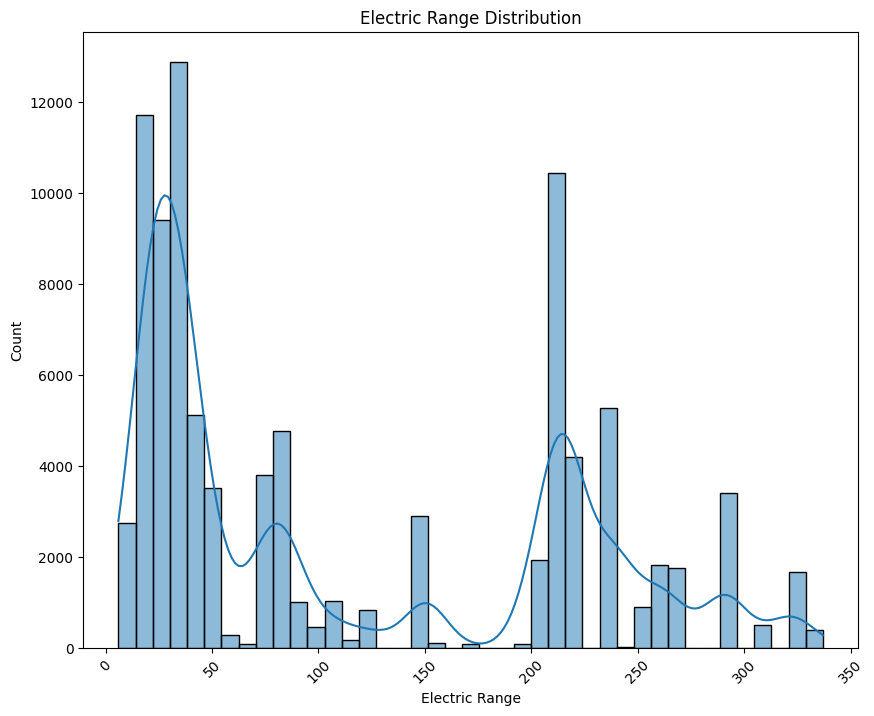

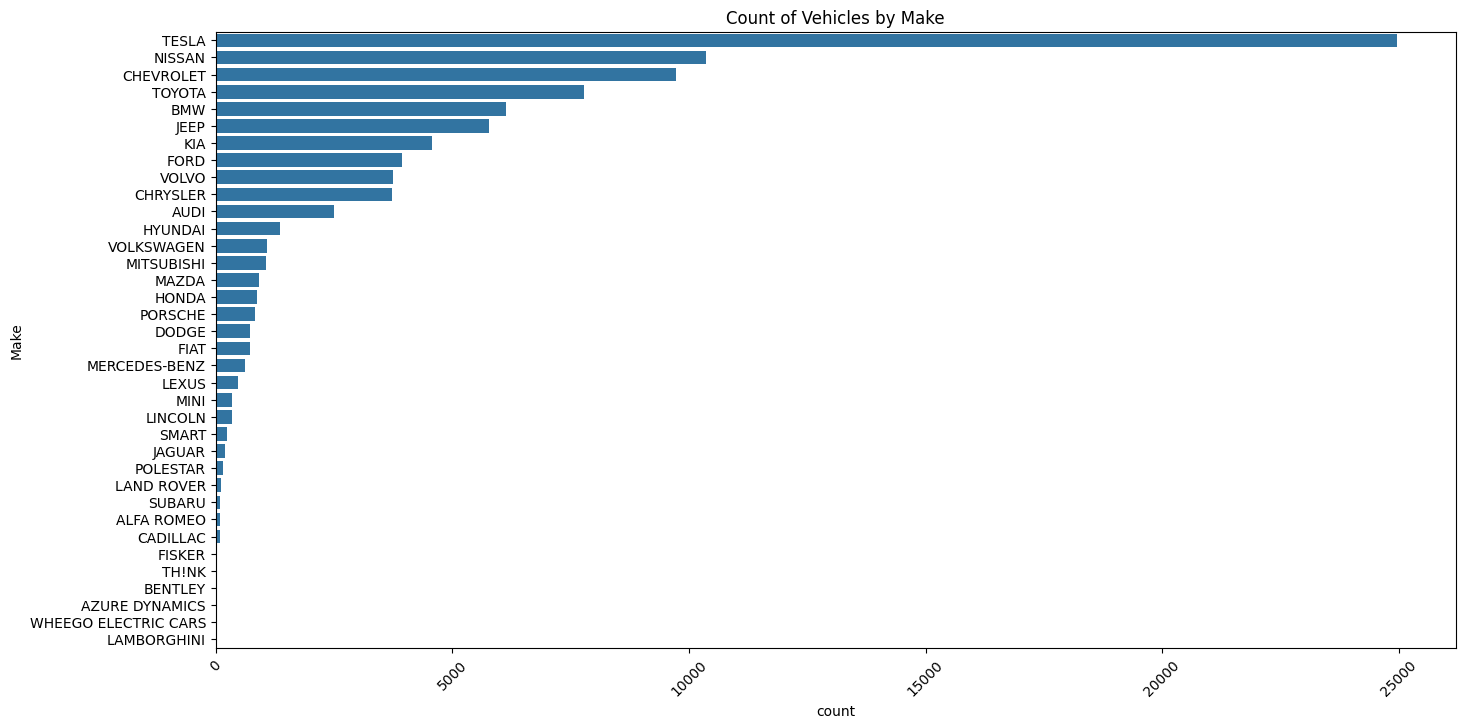

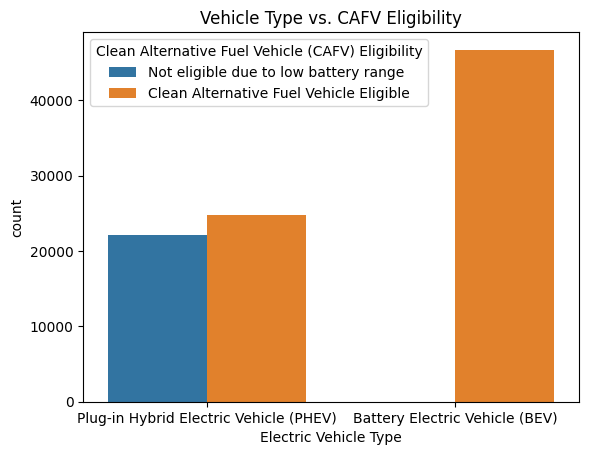

<ipython-input-1-f2fcf6d03d79>:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=non_eligible_vehicles, y="Model", order=non_eligible_vehicles["Model"].value_counts().index, palette="magma")


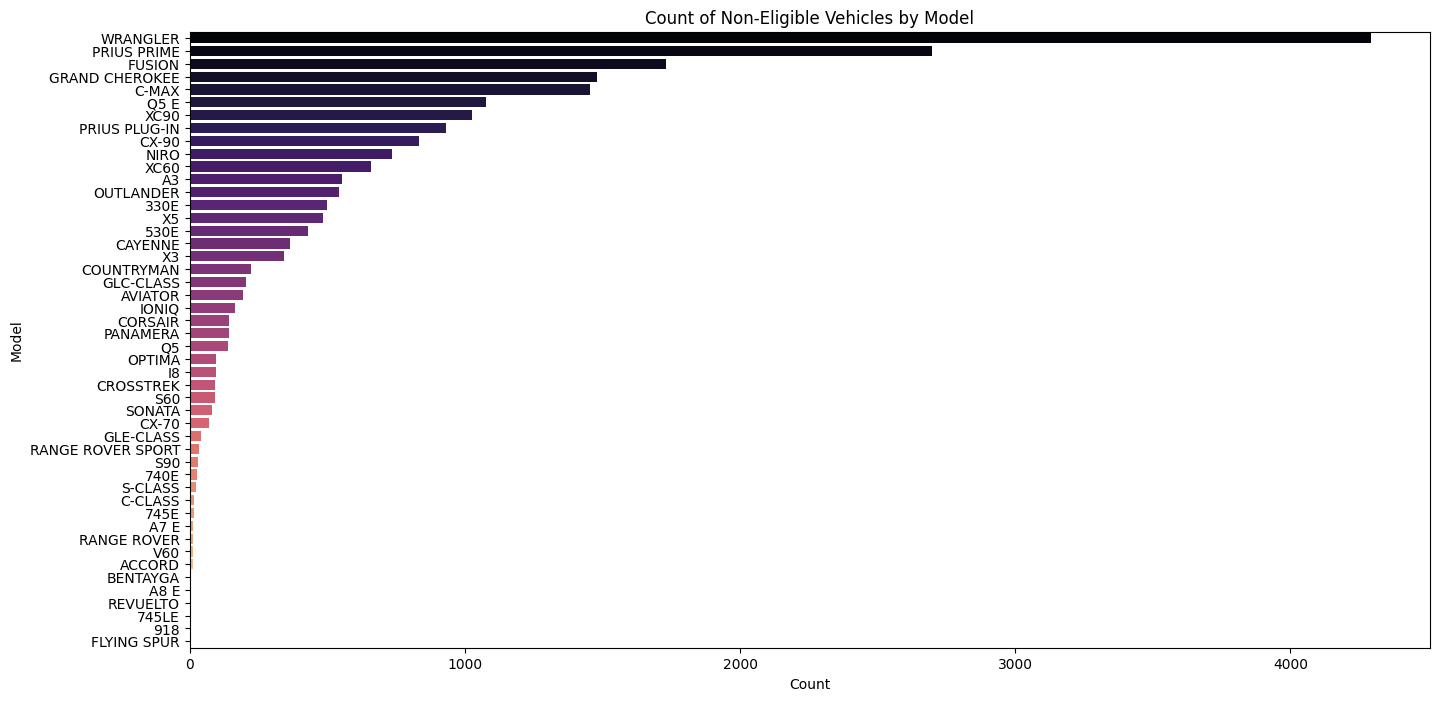

<ipython-input-1-f2fcf6d03d79>:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=eligible_vehicles, y="Model", order=eligible_vehicles["Model"].value_counts().index, palette="viridis")


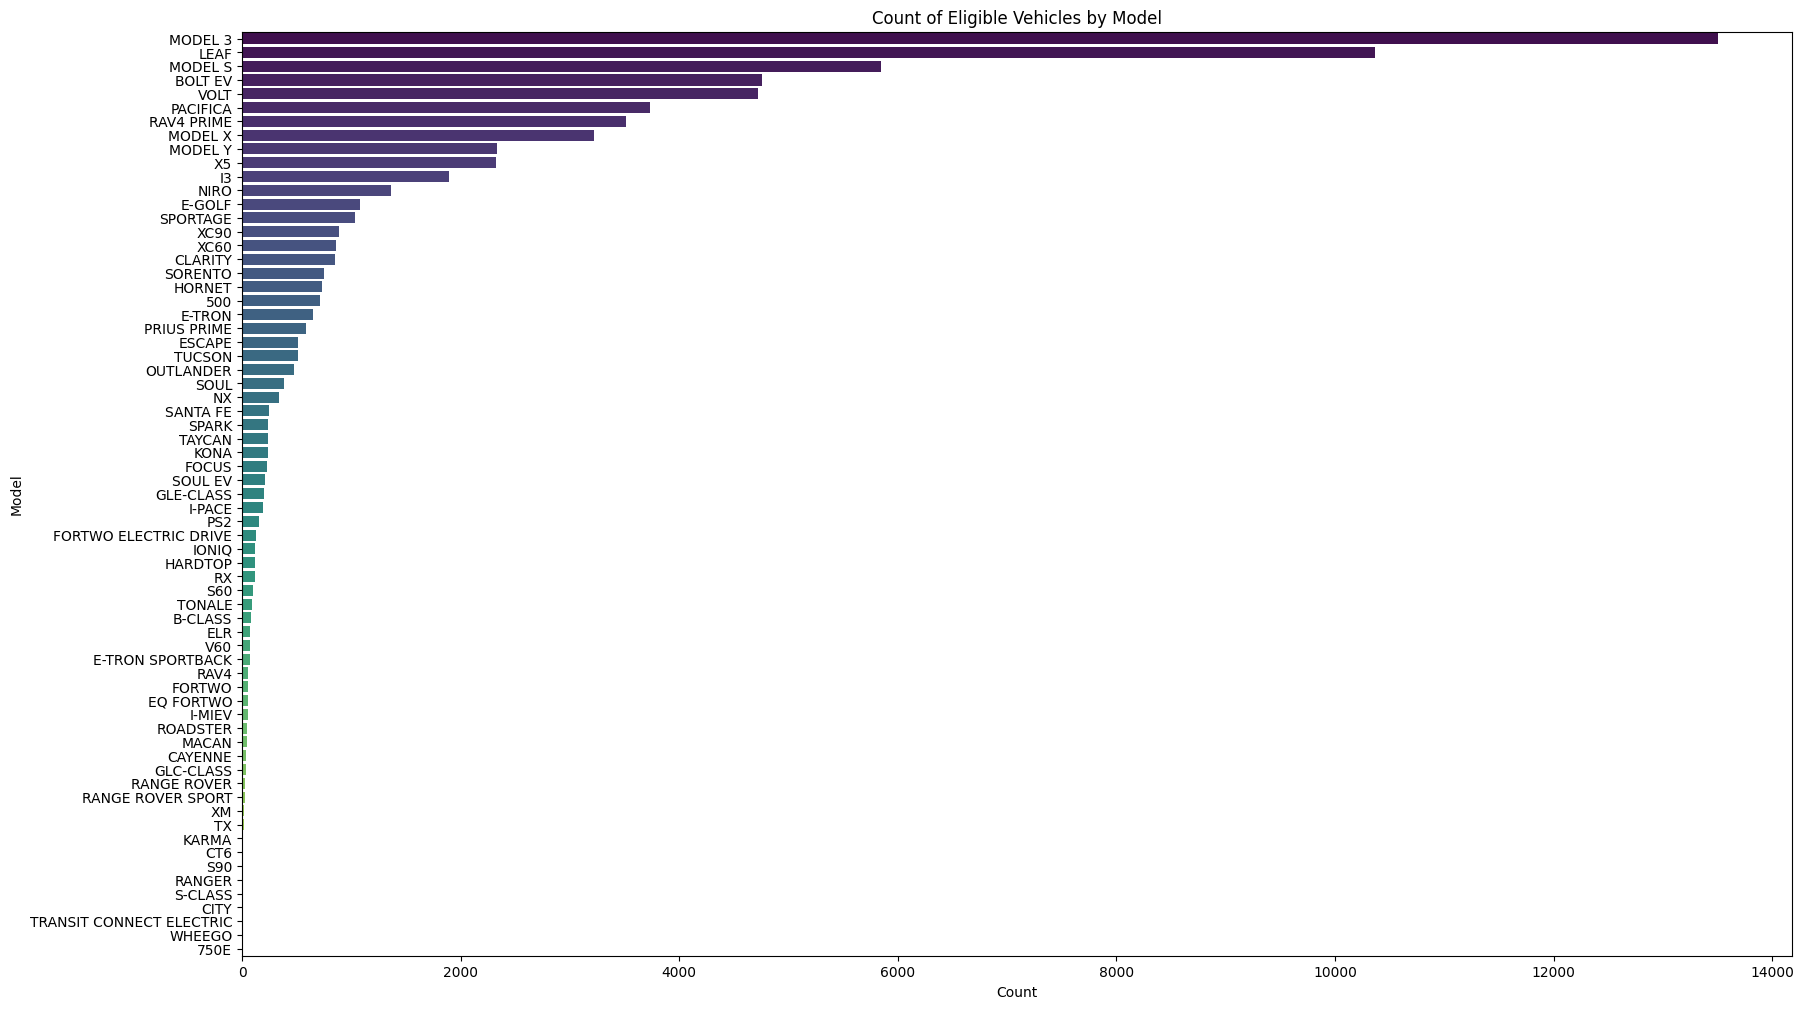

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Step 1: Read the CSV file
file_path = "Electric_Vehicle_Population_Data.csv"
df = pd.read_csv(file_path)

# Step 2: Display basic statistics and info
print("Dataset Overview:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())

# Step 3: Handle missing entries
print("\nMissing values per column:")
print(df.isnull().sum())

df.drop('Legislative District', axis=1, inplace=True)
df.drop('Vehicle Location', axis=1, inplace=True)
df.drop('2020 Census Tract', axis=1, inplace=True)

# Dropping rows with missing values (if applicable)
df.dropna(inplace=True)

# Step 4: Handle mismatched string formats
#not applicable

# Step 5: Handle outliers
df = df[df['Electric Range'] != 0]
df = df[df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] != 'Eligibility unknown as battery range has not been researched']

# Step 6: Visualization

plt.figure(figsize=(10, 8))

#1. Electric Range distribution
sns.histplot(df['Electric Range'], kde=True)
plt.title("Electric Range Distribution")
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.show()


#2. Count of vehicles by Make
plt.figure(figsize=(16, 8))
df['Make'] = df['Make'].astype('category')
sns.countplot(data=df, y="Make", order=df['Make'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Count of Vehicles by Make")
plt.show()

#3. Electric Vehicle Type vs. Clean Alternative Fuel Vehicle Eligibility
sns.countplot(data=df, x="Electric Vehicle Type", hue="Clean Alternative Fuel Vehicle (CAFV) Eligibility")
plt.title("Vehicle Type vs. CAFV Eligibility")
plt.show()

#4. Count of models which are not eligible
# Filter the dataset for non-eligible vehicles
non_eligible_vehicles = df[df["Clean Alternative Fuel Vehicle (CAFV) Eligibility"] == "Not eligible due to low battery range"]

# Plot the count of non-eligible vehicles by model
plt.figure(figsize=(16, 8))
sns.countplot(data=non_eligible_vehicles, y="Model", order=non_eligible_vehicles["Model"].value_counts().index, palette="magma")
plt.title("Count of Non-Eligible Vehicles by Model")
plt.xlabel("Count")
plt.ylabel("Model")
plt.show()


#5. Count of models which are eligible

# Filter the dataset for eligible vehicles
eligible_vehicles = df[df["Clean Alternative Fuel Vehicle (CAFV) Eligibility"] == "Clean Alternative Fuel Vehicle Eligible"]

# Plot the count of eligible vehicles by model
plt.figure(figsize=(20, 12))
sns.countplot(data=eligible_vehicles, y="Model", order=eligible_vehicles["Model"].value_counts().index, palette="viridis")
plt.title("Count of Eligible Vehicles by Model")
plt.xlabel("Count")
plt.ylabel("Model")
plt.show()


In [2]:
# Step 7: Identify uncorrelated features
df.columns = df.columns.str.strip()
#Label encoding
df['CAFV_Eligibility_Numeric'] = df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].map({
    'Clean Alternative Fuel Vehicle Eligible': 1,
    'Not eligible due to low battery range': 0
})
df.columns = df.columns.str.strip()
numeric_df = df.select_dtypes(include=['number'])
print (numeric_df)
correlation_matrix = numeric_df.corr()

print("\nCorrelation with target (Clean Alternative Fuel Vehicle (CAFV) Eligibility):")
#print(correlation_matrix["Clean Alternative Fuel Vehicle (CAFV) Eligibility"].sort_values(ascending=False))
print(correlation_matrix['CAFV_Eligibility_Numeric'])
#Dropping unrelated features
features_to_drop = ["DOL Vehicle ID", "Postal Code"]
print(df.columns)

df.drop(columns=features_to_drop, inplace=True)

# Step 8: Convert string columns to categorical

from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()
# Fit and transform columns
df['Make_Numeric'] = label_encoder.fit_transform(df['Make'])
df['Electric_Vehicle_Type_Numeric'] = label_encoder.fit_transform(df['Electric Vehicle Type'])

# Check the result
print(df[['Make', 'Make_Numeric']].head())

# Step 9: Normalize numerical features
numerical_cols = df.select_dtypes(include=["float64", "int64"]).columns
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Step 10: Choose target (Y) and features (X)

target_col = "CAFV_Eligibility_Numeric"
y = df[target_col]

selected_columns = ["Model Year", "Electric Range", "Make_Numeric", "Electric_Vehicle_Type_Numeric"]
X = df[selected_columns]

# Step 11: Split the dataset into training, testing, and validation sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_validation, y_test, y_validation = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Step 12: Print the shape of the splits
print("\nDataset Split Shapes:")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")
print(f"X_validation: {X_validation.shape}, y_validation: {y_validation.shape}")

        Postal Code  Model Year  Electric Range  Base MSRP  DOL Vehicle ID  \
0           98370.0        2023            21.0        0.0       258127145   
1           98258.0        2019           238.0        0.0         4735426   
2           98116.0        2015            81.0        0.0       272697666   
3           98178.0        2019           220.0        0.0       477309682   
4           98942.0        2015           208.0        0.0       258112970   
...             ...         ...             ...        ...             ...   
223977      98052.0        2024            21.0        0.0       269451780   
223982      98052.0        2019            32.0    39995.0       201968049   
223987      98284.0        2016           200.0        0.0       264574313   
223992      98466.0        2011            73.0        0.0       261733433   
223994      98072.0        2019           126.0        0.0       267288801   

        CAFV_Eligibility_Numeric  
0                           


Training Logistic Regression...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy for Logistic Regression: 0.7584 or 75.84%
Log Loss for Logistic Regression: 8.7065
Training Time for Logistic Regression: 0.19 seconds

Training Random Forest...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy for Random Forest: 0.7584 or 75.84%
Log Loss for Random Forest: 8.7065
Training Time for Random Forest: 3.00 seconds

Training Gradient Boosting...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
<ipython-input-4-3167304d75fc>:63: FutureWarning:

Accuracy for Gradient Boosting: 0.7584 or 75.84%
Log Loss for Gradient Boosting: 8.7065
Training Time for Gradient Boosting: 2.56 seconds


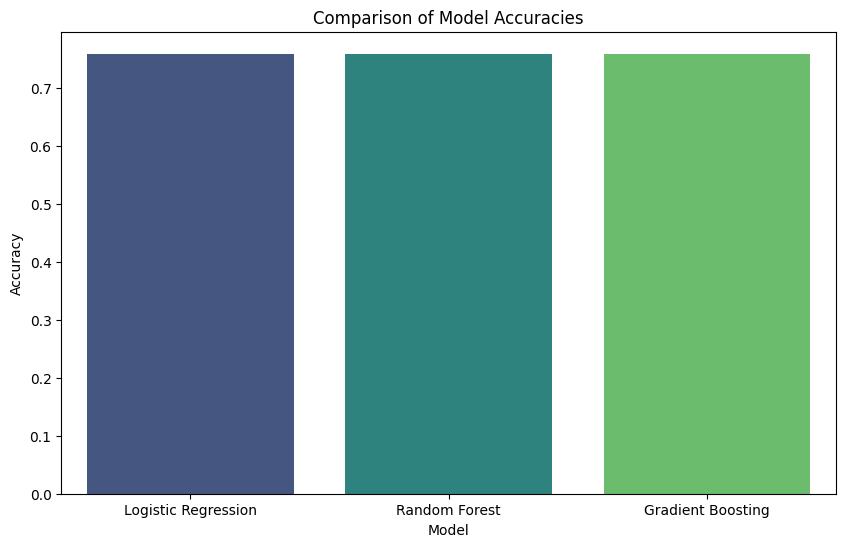

<ipython-input-4-3167304d75fc>:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=log_losses, palette="viridis")


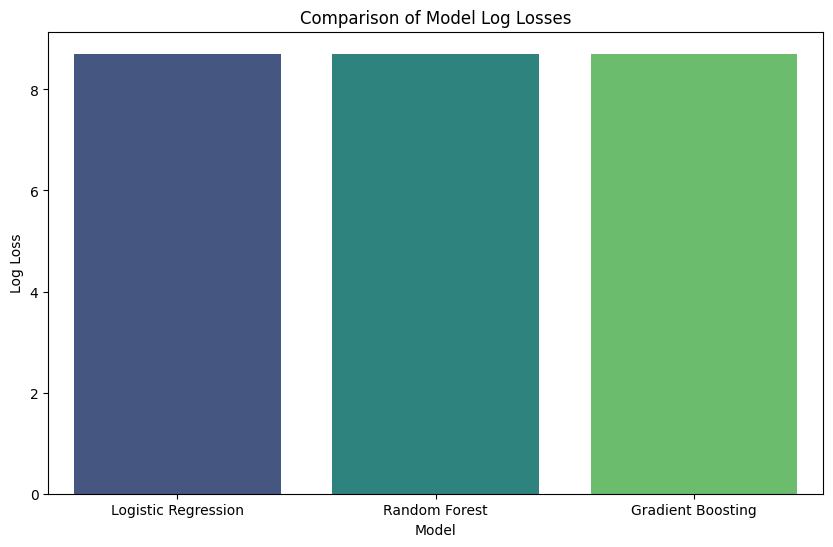

<ipython-input-4-3167304d75fc>:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=times, palette="viridis")


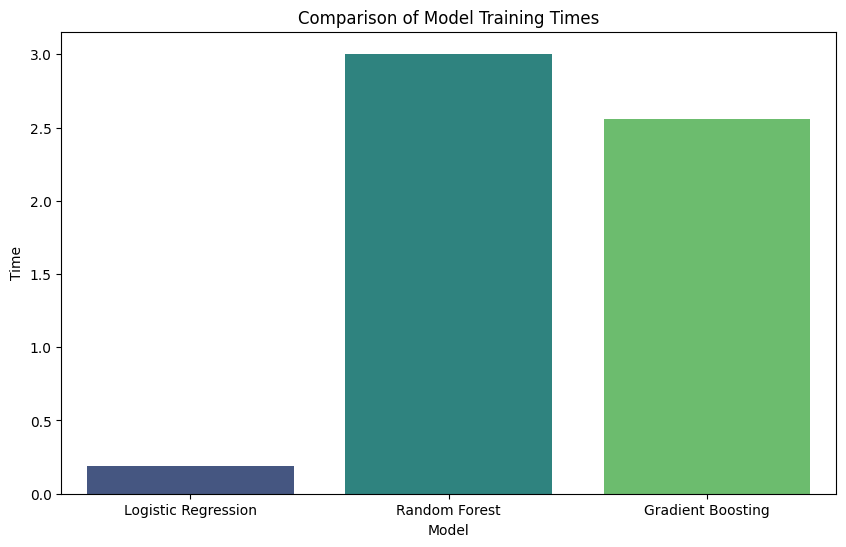

Validation Accuracy for Logistic Regression: 0.77
Validation Accuracy for Random Forest: 0.77
Validation Accuracy for Gradient Boosting: 0.77


In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss
import time

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
}

# Train and evaluate models
results = {}
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    # Train the model
    #print(X_train.dtypes)
    # Convert boolean columns to integers (0 or 1)
    start_time = time.time()
    X_train = X_train.astype(int)
    X_test = X_test.astype(int)
    X_validation = X_validation.astype(int)
    #print(X_train.dtypes)

    model.fit(X_train, y_train)

    # End time
    end_time = time.time()
    elapsed_time = end_time - start_time

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    loss = log_loss(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    # Save results
    results[model_name] = {
        "accuracy": accuracy,
        "confusion_matrix": cm,
        "classification_report": report,
        "log_loss": loss,
        "model": model,
        "training_time": elapsed_time
    }

    # Print metrics
    print(f"Accuracy for {model_name}: {accuracy:.4f} or {accuracy*100:.2f}%")
    print(f"Log Loss for {model_name}: {loss:.4f}")
    print(f"Training Time for {model_name}: {elapsed_time:.2f} seconds")

# Compare Models accuracies
plt.figure(figsize=(10, 6))
accuracies = [results[model_name]["accuracy"] for model_name in models]
model_names = list(models.keys())
sns.barplot(x=model_names, y=accuracies, palette="viridis")
plt.title("Comparison of Model Accuracies")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.show()

# Compare Models Log loss
plt.figure(figsize=(10, 6))
log_losses = [results[model_name]["log_loss"] for model_name in models]
model_names = list(models.keys())
sns.barplot(x=model_names, y=log_losses, palette="viridis")
plt.title("Comparison of Model Log Losses")
plt.ylabel("Log Loss")
plt.xlabel("Model")
plt.show()

# Compare Models time
plt.figure(figsize=(10, 6))
times = [results[model_name]["training_time"] for model_name in models]
model_names = list(models.keys())
sns.barplot(x=model_names, y=times, palette="viridis")
plt.title("Comparison of Model Training Times")
plt.ylabel("Time")
plt.xlabel("Model")
plt.show()

#  Evaluate on Validation Set
for model_name, result in results.items():
    model = result["model"]
    y_val_pred = model.predict(X_validation)
    val_accuracy = accuracy_score(y_validation, y_val_pred)
    print(f"Validation Accuracy for {model_name}: {val_accuracy:.2f}")


In [9]:
import time
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


# NN Model Definition
class SimpleNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# Set device (GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


# Prepare Data for PyTorch
# Convert the training, validation, and test sets (DataFrames) to torch tensors.
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
X_validation_tensor = torch.tensor(X_validation.values, dtype=torch.float32)
y_validation_tensor = torch.tensor(y_validation.values, dtype=torch.long)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

# Create DataLoaders for batching
batch_size = 32
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataset = TensorDataset(X_validation_tensor, y_validation_tensor)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Instantiate Model, Loss, Optimizer
input_dim = X_train.shape[1]   # In our case, 4 features
hidden_dim = 16
output_dim = 2                 # For binary classification with CrossEntropyLoss

model_nn = SimpleNN(input_dim, hidden_dim, output_dim).to(device)
criterion = nn.CrossEntropyLoss()
optimizer_nn = optim.Adam(model_nn.parameters(), lr=0.001)

# Training Loop with Validation Monitoring
num_epochs = 50
best_val_loss = float('inf')
train_losses = []
val_losses = []

start_time_nn = time.time()

for epoch in range(num_epochs):
    model_nn.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer_nn.zero_grad()
        outputs = model_nn(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer_nn.step()
        running_loss += loss.item() * inputs.size(0)

    epoch_train_loss = running_loss / len(train_loader.dataset)
    train_losses.append(epoch_train_loss)

    # Validation phase
    model_nn.eval()
    val_running_loss = 0.0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model_nn(inputs)
            loss = criterion(outputs, labels)
            val_running_loss += loss.item() * inputs.size(0)
    epoch_val_loss = val_running_loss / len(val_loader.dataset)
    val_losses.append(epoch_val_loss)

    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {epoch_train_loss:.4f}, Val Loss: {epoch_val_loss:.4f}")

    # Save best model weights based on validation loss
    if epoch_val_loss < best_val_loss:
        best_val_loss = epoch_val_loss
        torch.save(model_nn.state_dict(), "best_model_nn.pt")

end_time_nn = time.time()
nn_training_time = end_time_nn - start_time_nn
print(f"Neural Network Training Time: {nn_training_time:.2f} seconds")

Epoch 1/50, Train Loss: 0.3997, Val Loss: 0.3486
Epoch 2/50, Train Loss: 0.3430, Val Loss: 0.3466
Epoch 3/50, Train Loss: 0.3425, Val Loss: 0.3466
Epoch 4/50, Train Loss: 0.3423, Val Loss: 0.3468
Epoch 5/50, Train Loss: 0.3422, Val Loss: 0.3469
Epoch 6/50, Train Loss: 0.3422, Val Loss: 0.3467
Epoch 7/50, Train Loss: 0.3424, Val Loss: 0.3465
Epoch 8/50, Train Loss: 0.3423, Val Loss: 0.3465
Epoch 9/50, Train Loss: 0.3423, Val Loss: 0.3467
Epoch 10/50, Train Loss: 0.3423, Val Loss: 0.3464
Epoch 11/50, Train Loss: 0.3421, Val Loss: 0.3464
Epoch 12/50, Train Loss: 0.3422, Val Loss: 0.3466
Epoch 13/50, Train Loss: 0.3423, Val Loss: 0.3463
Epoch 14/50, Train Loss: 0.3422, Val Loss: 0.3464
Epoch 15/50, Train Loss: 0.3422, Val Loss: 0.3467
Epoch 16/50, Train Loss: 0.3423, Val Loss: 0.3467
Epoch 17/50, Train Loss: 0.3422, Val Loss: 0.3466
Epoch 18/50, Train Loss: 0.3422, Val Loss: 0.3463
Epoch 19/50, Train Loss: 0.3423, Val Loss: 0.3470
Epoch 20/50, Train Loss: 0.3422, Val Loss: 0.3468
Epoch 21/

In [10]:
# Test Evaluation of NN
# Load best weights
model_nn.load_state_dict(torch.load("best_model_nn.pth"))
model_nn.eval()

test_running_loss = 0.0
all_test_labels_nn = []
all_test_preds_nn = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = model_nn(inputs)
        loss = criterion(outputs, labels)
        test_running_loss += loss.item() * inputs.size(0)
        _, preds = torch.max(outputs, 1)
        all_test_labels_nn.extend(labels.cpu().numpy())
        all_test_preds_nn.extend(preds.cpu().numpy())

test_loss_nn = test_running_loss / len(test_loader.dataset)
test_accuracy_nn = accuracy_score(all_test_labels_nn, all_test_preds_nn)
print(f"Neural Network Test Loss: {test_loss_nn:.4f}")
print(f"Neural Network Test Accuracy: {test_accuracy_nn:.4f} or {test_accuracy_nn*100:.2f}%")

# Save NN Results for Comparison
results["Neural Network"] = {
    "accuracy": test_accuracy_nn,
    "log_loss": test_loss_nn,
    "training_time": nn_training_time,
    "confusion_matrix": confusion_matrix(y_test, all_test_preds_nn),
    "classification_report": classification_report(y_test, all_test_preds_nn),
    "model": model_nn
}


<ipython-input-10-8bfc2512f8d8>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_nn.load_state_dict(torch.load("best_model_nn.pth"))


Neural Network Test Loss: 0.3445
Neural Network Test Accuracy: 0.7584 or 75.84%


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<ipython-input-11-3317fd71928c>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names_all, y=accuracies_all, palette="viridis")


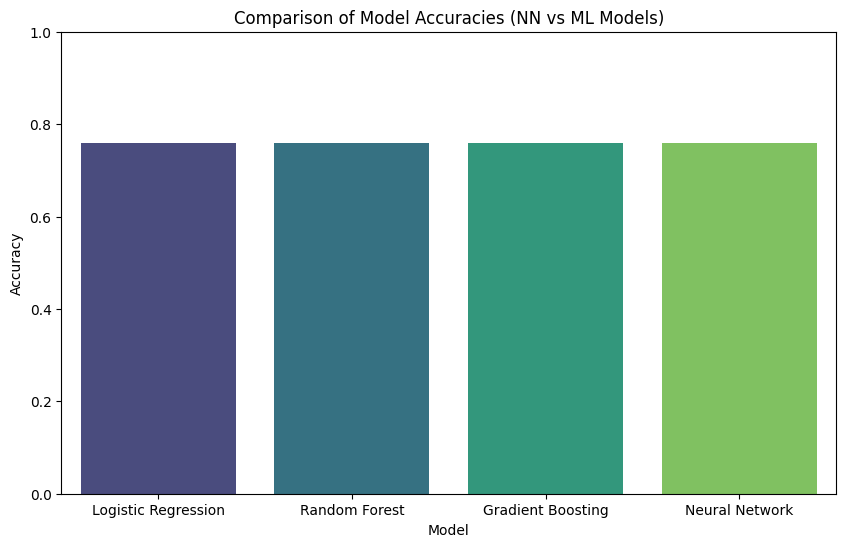

<ipython-input-11-3317fd71928c>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names_all, y=log_losses_all, palette="viridis")


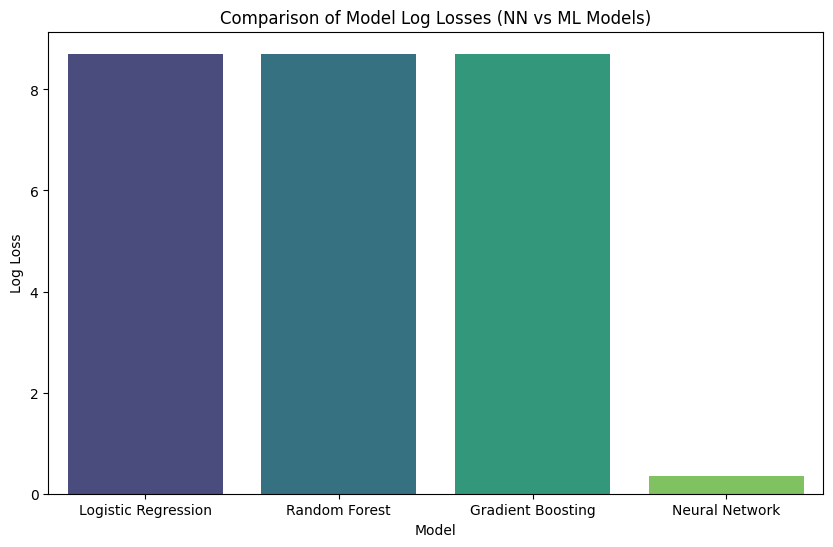

<ipython-input-11-3317fd71928c>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names_all, y=training_times_all, palette="viridis")


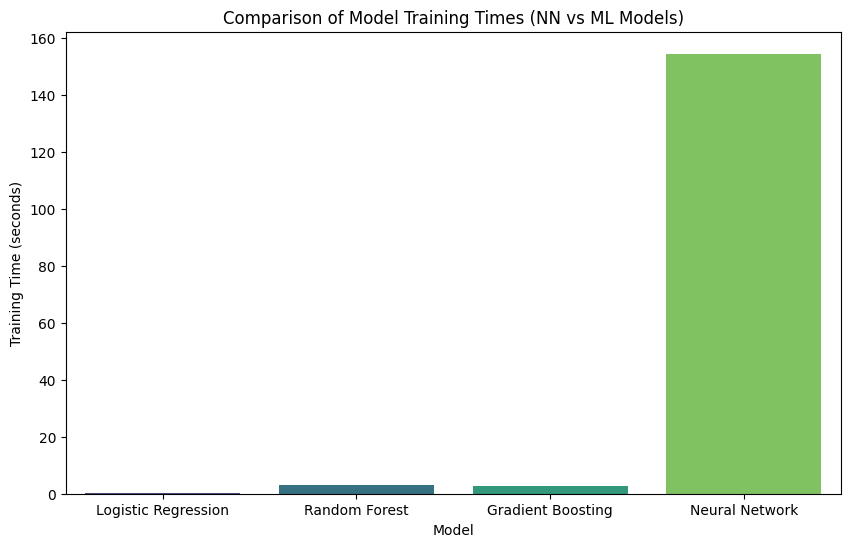

In [11]:
# Comparison Plots (NN vs. ML Models)

model_names_all = list(results.keys())
accuracies_all = [results[model]["accuracy"] for model in model_names_all]
log_losses_all = [results[model]["log_loss"] for model in model_names_all]
training_times_all = [results[model]["training_time"] for model in model_names_all]

plt.figure(figsize=(10, 6))
sns.barplot(x=model_names_all, y=accuracies_all, palette="viridis")
plt.title("Comparison of Model Accuracies (NN vs ML Models)")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.ylim(0,1)
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=model_names_all, y=log_losses_all, palette="viridis")
plt.title("Comparison of Model Log Losses (NN vs ML Models)")
plt.ylabel("Log Loss")
plt.xlabel("Model")
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=model_names_all, y=training_times_all, palette="viridis")
plt.title("Comparison of Model Training Times (NN vs ML Models)")
plt.ylabel("Training Time (seconds)")
plt.xlabel("Model")
plt.show()